In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [3]:
from TileEM_plot_toolbox import *
from qualityBaseline import *
from glob import glob

In [51]:
worker_Nbatches={5:10,10:8,15:6,20:4,25:2,30:1}
sampleN_lst=worker_Nbatches.keys()
Nsample_lst = worker_Nbatches.keys()

# Data Table 

In [ ]:
# add ground truth Tile 

In [121]:
PR_tbl = pd.read_csv("GT_PR.csv",index_col=0)
PR_tbl = PR_tbl.rename(index=str,columns={'GT Tile-based Precision':'P [GT Tile-based]','GT Tile-based Recall':'R [GT Tile-based]'})

In [122]:
PR_tbl

,object_id,P [GT Tile-based],R [GT Tile-based],GT A_thres
0,1,0.199121,0.968257,8.336538
1,2,0.962979,0.981210,11.607561
2,3,0.939696,0.095305,12.099832
3,4,0.969633,0.942835,12.649492
4,5,0.951914,0.932064,9.465079
5,6,0.961495,0.900493,1.208874
6,7,0.949913,0.582125,13.908456
7,8,0.966967,0.928553,22.750652
8,9,0.986355,0.965070,8.486176
9,10,0.984834,0.976777,11.647102


In [ ]:

for Nworker in sampleN_lst:
    for batch_num in range(worker_Nbatches[Nworker]):
        dir_name = "{0}worker_rand{1}".format(Nworker,batch_num)

        print "Working on :", dir_name
        os.chdir("sample/"+dir_name)
        
        PR_tbl = pd.read_csv("GT_PR.csv",index_col=0)
        PR_tbl = PR_tbl.rename(index=str,columns={'GT Tile-based Precision':'P [GT Tile-based]','GT Tile-based Recall':'R [GT Tile-based]'})
        #df = df.merge(PR_tbl[["object_id","P [GT Tile-based]","R [GT Tile-based]"]],on="object_id")
        os.chdir("../../")

In [68]:
def selected_attr2col_lst(selected_attr_lst):
    selected_col_lst =[]
    for attr in selected_attr_lst:
        selected_col_lst.append("P [{}]".format(attr))
        selected_col_lst.append("R [{}]".format(attr))
    return selected_col_lst

In [61]:
from tabulate import tabulate

In [64]:
ls -ltr concat_sample10_PR.csv

-rw-rw----. 1 jlee782 jlee782 173686 May  3 10:14 concat_sample10_PR.csv


In [93]:
Nsample=5
df = pd.read_csv("concat_sample{}_PR.csv".format(Nsample),index_col=0)
df = data_clean(df)

In [80]:
def data_clean(df):
    df = df.rename(index=str,columns={'P [Jaccard [Self]]':'P [GT Jaccard]','R [Jaccard [Self]]':'R [GT Jaccard]',\
                             'P [Precision [Self]]':'P [GT Precision]','R [Precision [Self]]':'R [GT Precision]',\
                             'P [Recall [Self]]':'P [GT Recall]','R [Recall [Self]]':'R [GT Recall]',\
                            })
    return df

In [114]:
best_TileEM_attr = 'TileEM thres=40'
selected_attr_lst = ['Num Points','Area Ratio','MVT','GT Precision','GT Recall','GT Jaccard','Vision GT 50%']
selected_attr_lst.append(best_TileEM_attr)
selected_col_lst = selected_attr2col_lst(selected_attr_lst)

In [117]:
df_all = pd.DataFrame()
cols  = []
for Nsample in sorted(Nsample_lst[:-2]):
    df = pd.read_csv("concat_sample{}_PR.csv".format(Nsample))
    df = data_clean(df)
    cols.append(Nsample)
    df_all[Nsample]=df[selected_col_lst].mean()

In [ ]:
#reordering columns so that sort by category + limit 
df_all.reindex([u'P [Num Points]', u'R [Num Points]', u'P [Area Ratio]',
               u'R [Area Ratio]',u'P [GT Precision]', u'R [GT Precision]', u'P [GT Recall]',
               u'R [GT Recall]', u'P [TileEM]', u'R [TileEM]', u'P [MVT]', u'R [MVT]',
                u'P [Vision Best Area Ratio 50%]',
               u'R [Vision Best Area Ratio 50%]', u'P [Vision Best Num Points 50%]',
               u'R [Vision Best Num Points 50%]', u'P [Vision GT 50%]',
               u'R [Vision GT 50%]'])

In [119]:
df.keys()

Index([u'Unnamed: 0', u'object_id', u'P [Num Points]', u'R [Num Points]',
       u'P [Area Ratio]', u'R [Area Ratio]', u'P [GT Jaccard]',
       u'R [GT Jaccard]', u'P [GT Precision]', u'R [GT Precision]',
       u'P [GT Recall]', u'R [GT Recall]', u'P [Vision Best Area Ratio 50%]',
       u'R [Vision Best Area Ratio 50%]', u'P [Vision Best Num Points 50%]',
       u'R [Vision Best Num Points 50%]', u'P [Vision GT 10%]',
       u'R [Vision GT 10%]', u'P [Vision GT 50%]', u'R [Vision GT 50%]',
       u'P [Vision GT 90%]', u'R [Vision GT 90%]', u'P [TileEM thres=-40]',
       u'R [TileEM thres=-40]', u'P [TileEM thres=-20]',
       u'R [TileEM thres=-20]', u'P [TileEM thres=0]', u'R [TileEM thres=0]',
       u'P [TileEM thres=20]', u'R [TileEM thres=20]', u'P [TileEM thres=40]',
       u'R [TileEM thres=40]', u'P [MVT]', u'R [MVT]', u'P [MVTtop10]',
       u'R [MVTtop10]', u'P [MVTtop95%]', u'R [MVTtop95%]'],
      dtype='object')

In [118]:
df_all

,5,10,15,20
P [Num Points],0.878224,0.779267,0.762799,0.796862
R [Num Points],0.894116,0.799089,0.804194,0.842352
P [Area Ratio],0.816415,0.669896,0.633180,0.636117
R [Area Ratio],0.891787,0.832980,0.829453,0.844483
P [MVT],0.858036,0.816709,0.809150,0.799103
R [MVT],0.815957,0.568774,0.484883,0.397747
P [GT Precision],0.962779,0.889427,0.885046,0.924552
R [GT Precision],0.877011,0.774192,0.758982,0.782494
P [GT Recall],0.899581,0.776398,0.756738,0.772778
R [GT Recall],0.975046,0.894274,0.891281,0.933498


# Visualizations 

In [6]:
selected_attr_lst = ['Num Points','Area Ratio','TileEM','MVT','GT Precision','GT Recall','GT Jaccard',\
                     'Vision Best Area Ratio 50%','Vision Best Num Points 50%','Vision GT 50%']
selected_col_lst =[]
for attr in selected_attr_lst:
    selected_col_lst.append("P [{}]".format(attr))
    selected_col_lst.append("R [{}]".format(attr))

In [112]:
def plot_PR(Nsample,selected_attr_lst):
    df = pd.read_csv("sample{}_PR.csv".format(Nsample))
    df=data_clean(df)
    plt.figure()
    plt.title("{0} worker sample averaged over {1} batches".format(Nsample,worker_Nbatches[Nsample]))
    for attr in selected_attr_lst:
        plt.plot(df["R [{}]".format(attr)],df["P [{}]".format(attr)],'.',label=attr)
    plt.xlabel("Recall",fontsize=14)
    plt.ylabel("Precision",fontsize=14)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

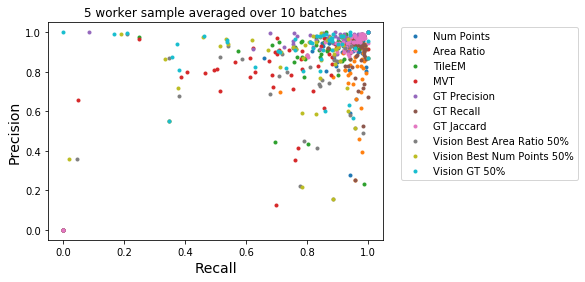

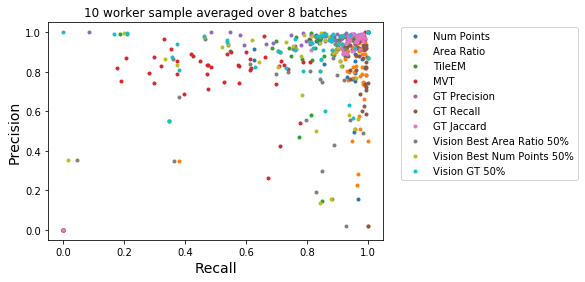

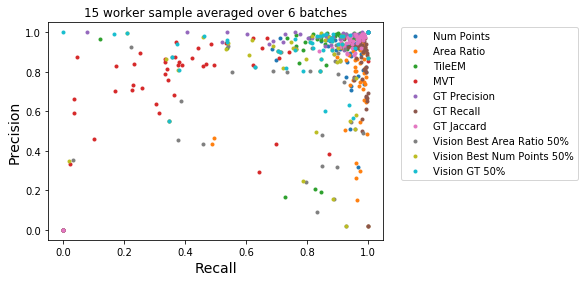

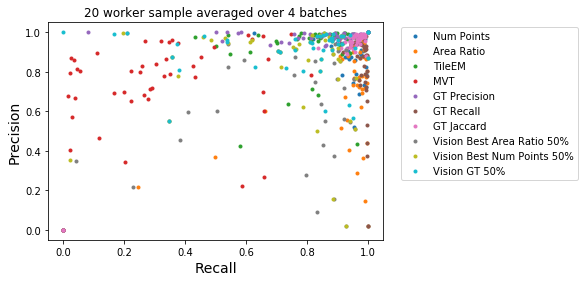

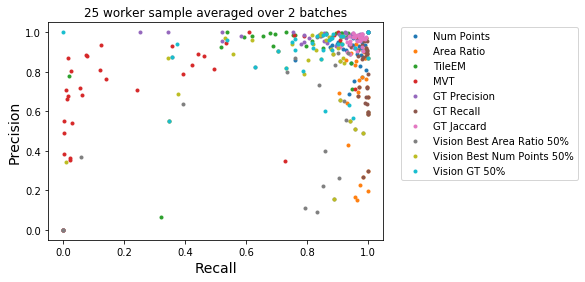

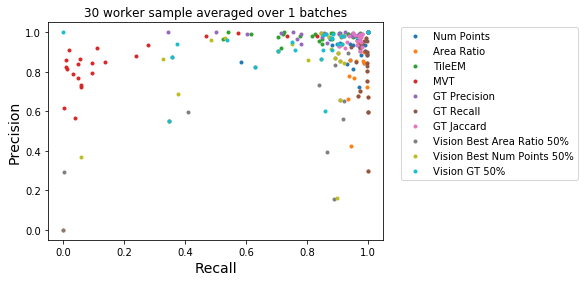

In [113]:
for Nsample in Nsample_lst:
    plot_PR(Nsample,['Num Points','Area Ratio','TileEM','MVT','GT Precision','GT Recall','GT Jaccard',\
                     'Vision Best Area Ratio 50%','Vision Best Num Points 50%','Vision GT 50%'])

In [146]:
def plot_sample_worker_PR(selected_attr_lst,y_axis='Precision'):
    plt.figure()
    selected_col_lst =[]
    for attr in selected_attr_lst:
        if y_axis=="Precision":selected_col_lst.append("P [{}]".format(attr))
        if y_axis=="Recall":selected_col_lst.append("R [{}]".format(attr))
    df_all = pd.DataFrame() #mean 
    df_all_std = pd.DataFrame() # std
    cols  = []
    y_err_lst = []
    y_val_lst =[]
    for Nsample in sorted(Nsample_lst):
        df = pd.read_csv("sample{}_PR.csv".format(Nsample))
        df=data_clean(df)
        cols.append(Nsample)
        y_val_lst.append(list(df[selected_col_lst].mean()))
        y_err_lst.append(list(df[selected_col_lst].std()))

    y_val_lst = np.array(y_val_lst).T
    y_err_lst = np.array(y_err_lst).T

    for i in range(len(y_val_lst)):
        plt.plot(sorted(Nsample_lst),y_val_lst[i],label=selected_col_lst[i])
        #plt.errorbar(sorted(Nsample_lst),y_val_lst[i],label=selected_col_lst[i], yerr=y_err_lst[i],capsize=3)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
    plt.xlabel("N sample")
    #plt.ylim(0,1)

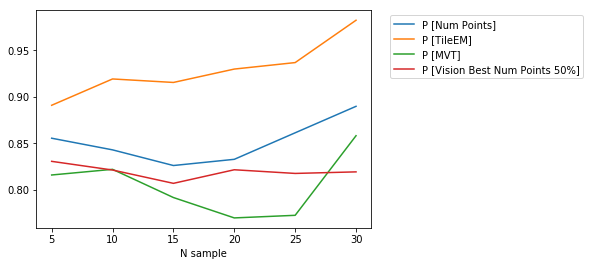

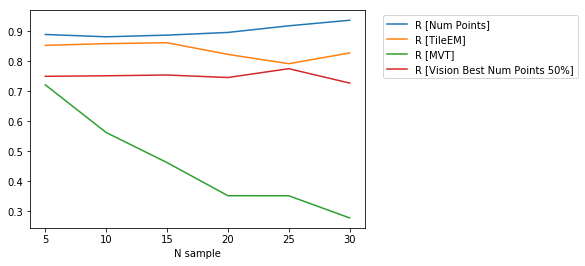

In [147]:
# selected_attr_lst=['Num Points','Area Ratio','TileEM','MVT','GT Precision','GT Recall','GT Jaccard',\
#                      'Vision Best Area Ratio 50%','Vision Best Num Points 50%','Vision GT 50%']

selected_attr_lst=['Num Points','TileEM','MVT','Vision Best Num Points 50%']
plot_sample_worker_PR(selected_attr_lst,y_axis="Precision")

plot_sample_worker_PR(selected_attr_lst,y_axis="Recall")

In [137]:
def plot_PR_vary_sample_size(algorithm):
    plt.figure()
    plt.title("PR across different worker samples [{}]".format(algorithm),fontsize=14)

    for Nsample in Nsample_lst:
        df = pd.read_csv("sample{}_PR.csv".format(Nsample))
        df=data_clean(df)
        plt.plot(df["R [{}]".format(algorithm)],df["P [{}]".format(algorithm)],'.',label="N={}".format(Nsample))

    plt.xlabel("Recall",fontsize=13)
    plt.ylabel("Precision",fontsize=13)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

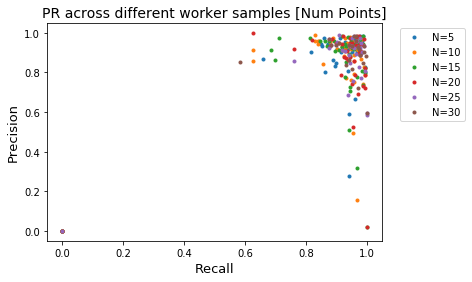

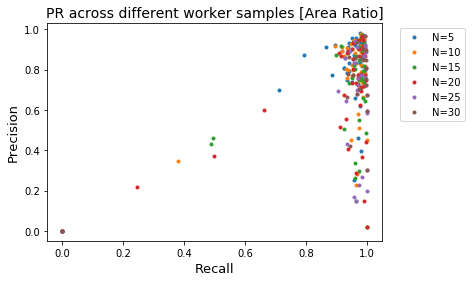

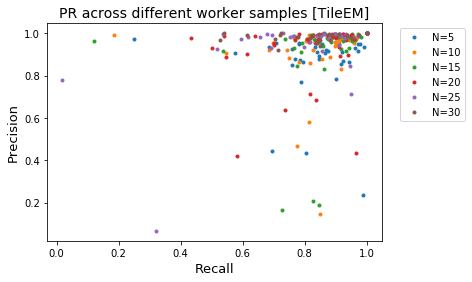

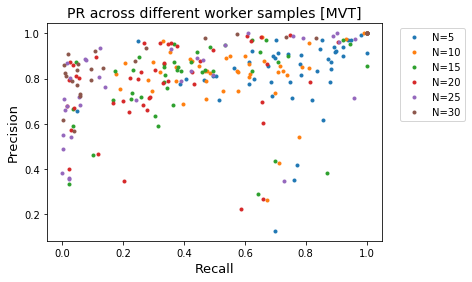

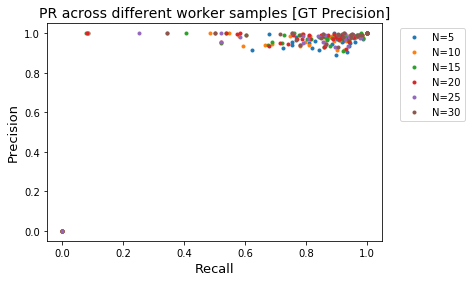

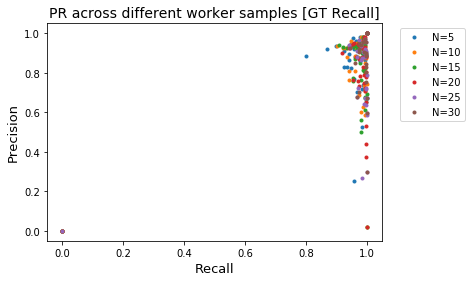

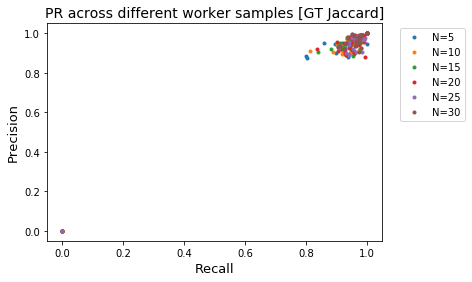

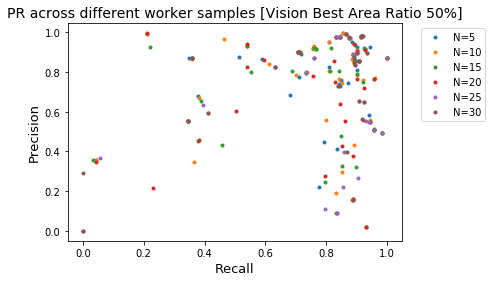

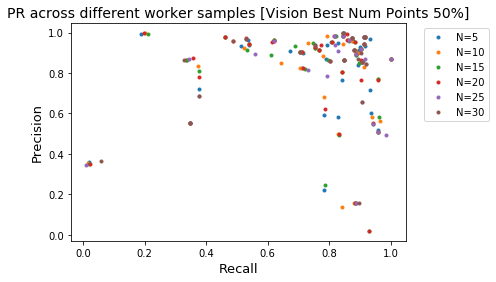

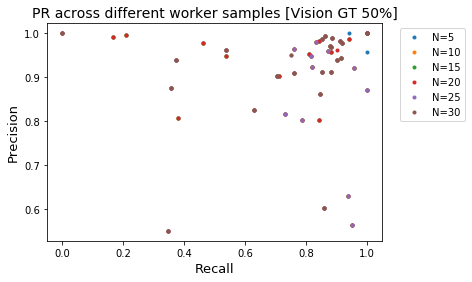

In [139]:
for algo in selected_attr_lst:
    plot_PR_vary_sample_size(algo)

# Effects of varying threshold

In [41]:
tbl.filter(regex="TileEM").filter(regex="P").mean()

P [TileEM thres=-40]    0.904520
P [TileEM thres=-20]    0.911689
P [TileEM thres=0]      0.917484
P [TileEM thres=20]     0.926314
P [TileEM thres=40]     0.932203
dtype: float64

In [53]:
def plot_vary_threshold(Nworker):
    plt.figure()
    tbl= pd.read_csv("concat_sample{}_PR.csv".format(Nworker),index_col=0)
    thres_lst = [-40,-20,0,20,40]
    plt.plot(thres_lst,list(tbl.filter(regex="TileEM").filter(regex="P").mean()),label="Precision")
    plt.plot(thres_lst,list(tbl.filter(regex="TileEM").filter(regex="R").mean()),label="Recall")
    plt.title("N worker={}".format(Nworker),fontsize=14)
    plt.xlabel("Threshold",fontsize=13)
    plt.legend()

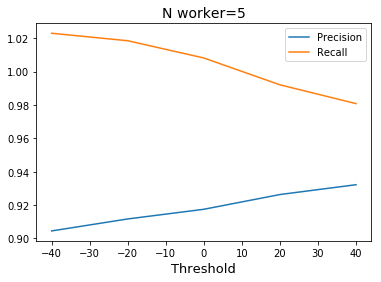

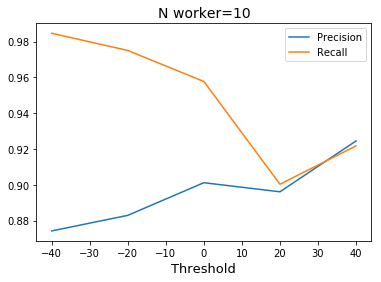

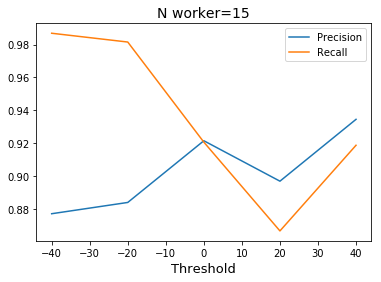

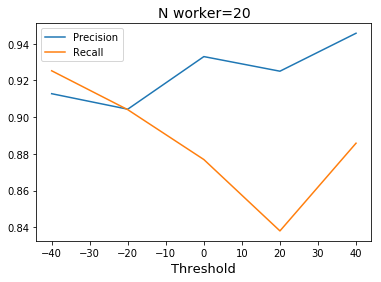

In [56]:
for Nworker in worker_Nbatches.keys()[:4]:
    plot_vary_threshold(Nworker)

---------------------------------------------------------------------------------------------------------